# Caracterização Meteorológica da área de estudo

Aluna: Bárbara Girardi

Nesta atividade, caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia da Superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, Razão de Bowen e Rugosidade

## Meteorologia de Superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR para o período de 01/01/2023 a 01/01/2024.

Os dados estarão na pasta inputs/meteoSuperficie com a nomenclatura metar.csv

In [29]:
#Selecionar arquivo para análise

import os #faz puxar a tabela pro código
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie' #puxa a pasta correta de onde está o dado (tabela). Fazendo assim, consigo escolher qualquer arquivo para puxar dentro dessa pasta
print(metSuperficiePath) 

#Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath) #lista todos os dados que tem na pasta
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [30]:
#Abrindo os arquivos metar
import pandas as pd

#Abrindo cada arquivo dentro da pasta e acumulado em uma lista chamada de metSuperficie
metSuperficie = []
for file in files: #faz um por um
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file)) #concatena o caminho da pasta junto com dois arquivos. 

#Convertendo o metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [31]:
#Criar uma coluna com Datetime dos dados

metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])

#Definindo a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 26251, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


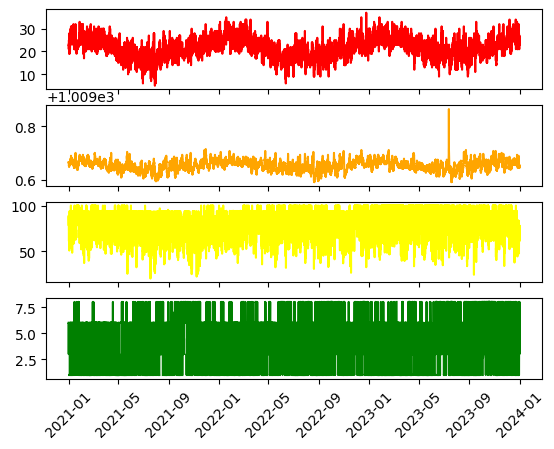

In [32]:
#Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4, sharex = True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'], color = 'yellow')
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'], color = 'green')
ax[3].tick_params(axis='x', rotation = 45)

O percentil 99 da temperatura é: 31.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 da relh é: 100.0
O percentil 99 da cco é: nan


{'whiskers': [<matplotlib.lines.Line2D at 0x14ccbbc0810>,
 'caps': [<matplotlib.lines.Line2D at 0x14ccbbc1f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ccbb93f10>],
 'medians': [<matplotlib.lines.Line2D at 0x14ccbbc3450>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ccbbc3f10>],
 'means': []}

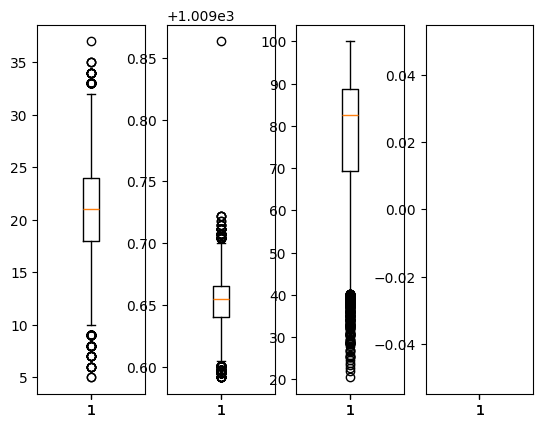

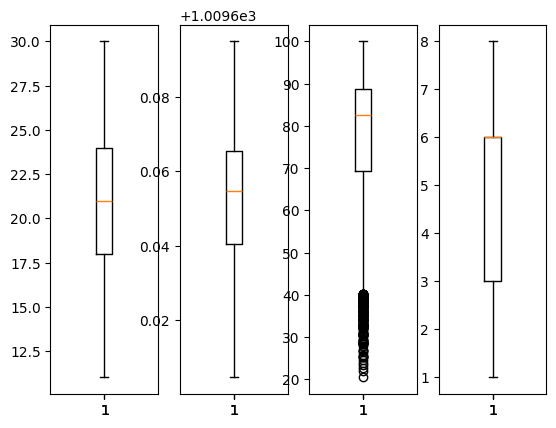

In [33]:
#Fazendo boxplot (do ano inteiro) das variáveis
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4, sharex = True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco']) #Dado bruto, com valores faltantes
#Para cada variável, temos o valor em y de acordo. As bolinhas representam cada valor. Na região onde está o box, está 25 - 75 % dos dados. onde está a linha de cada lado, está de 0,5% a 25 e na parte superior, de 75% a 99,5.
#Logo, a probabilidade de acontecer um valor entre os valores do box é de 25 - 75%, enquanto os valores fora do box e da linha, há probabilidade de 0,5% para cada lado de ocorrer.
import numpy as np

#Removendo valores acima do percentil 95
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é: '+str(temp99)) #Logo, removi os 1% maiores

p99 = np.nanpercentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é: '+str(p99)) 

relh99 = np.percentile(metSuperficie['relh'], 99)
print('O percentil 99 da relh é: '+str(relh99))

cco99 = np.percentile(metSuperficie['cco'], 99)
print('O percentil 99 da cco é: '+str(cco99))



fig,ax = plt.subplots(1,4, sharex = True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) &
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))]) #quando for verdadeiro, aceita o valor; quando for falso, exclui

ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) &
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])

ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])]) #Dado ajustado, pegando apenas os valores e tirando NaN

C:\Users\Acer\AppData\Local\Temp\ipykernel_18080\820385973.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Acer\AppData\Local\Temp\ipykernel_18080\820385973.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2021-01-31  16.000000    1.0  2021.0  11.500000 NaN  214.774965  3.575005   
2021-02-28  14.500000    2.0  2021.0  11.500000 NaN  197.668222  3.371675   
2021-03-31  15.975741    3.0  2021.0  11.513477 NaN  224.959212  3.361566   
2021-04-30  15.500000    4.0  2021.0  11.500000 NaN  202.069544  3.382410   
2021-05-31  16.000000    5.0  2021.0  11.500000 NaN  230.860097  3.062866   
2021-06-30  15.500000    6.0  2021.0  11.500000 NaN  223.320988  3.332454   
2021-07-31  16.000000    7.0  2021.0  11.500000 NaN  246.718310  3.184159   
2021-08-31  16.000000    8.0  2021.0  11.500000 NaN  230.422406  3.678955   
2021-09-30  15.500000    9.0  2021.0  11.500000 NaN  231.086331  4.086376   
2021-10-31  16.343490   10.0  2021.0  11.515235 NaN  197.640862  4.067635   
2021-11-30  15.500000   11.0  2021.0  11.500000 NaN  200.488045  4.130533   

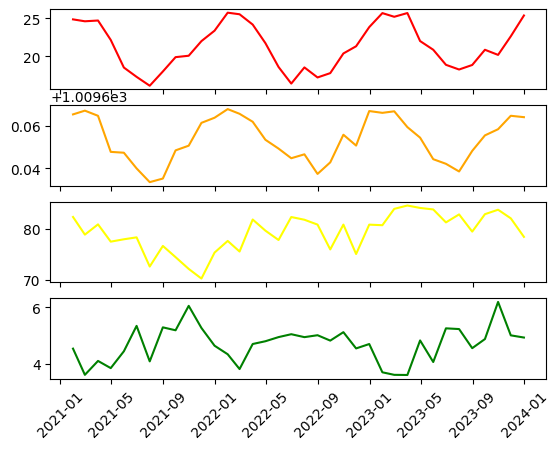

In [34]:
# Estatísticas dos dados

metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

#Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4, sharex = True)
ax[0].plot(media_mensal.index,media_mensal['temp'], color = 'red') #.index é o indice da matriz
ax[1].plot(media_mensal.index,media_mensal['p'], color = 'orange')
ax[2].plot(media_mensal.index,media_mensal['relh'], color = 'yellow')
ax[3].plot(media_mensal.index,media_mensal['cco'], color = 'green')
ax[3].tick_params(axis='x', rotation = 45)

print(media_mensal)
print(min_mensal)

#A media mensal pega a amostragem dos meses que são do mesmo ano e fazer a média.
#Após, cria outro dataframe, que tem as mesmas coluna do dt original
#Plotou no eixo x o indice, entao para a media mensal 

Fazer nessa parte a fill between


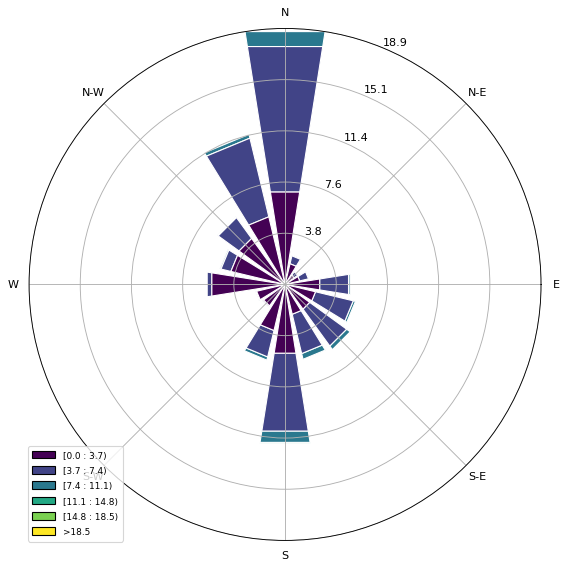

In [35]:
#Criando minha rosa dos ventos
from windrose import WindroseAxes #tive que baixxar no Terminal pelo pip install: pip install windrose

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed = True, opening = 0.8, edgecolor='white')
ax.set_legend()

# Análise upperair/sondagem/perfil da atmosfera

Nesta seção vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

Siphon: compila dados de temperatura

In [36]:
from datetime import datetime
#from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir #importta o pacote

date = datetime(2024,1,10,0) #Referente ao dia 10/01/2024. o ultimo elemente é o horário, pensando que no BR é até 12.
station = 'SBFL' #Referente a estação de Florianopolis conforme o site https://weather.uwyo.edu/upperair/sounding.html

df = WyomingUpperAir.request_data(date,station)
print(df)

    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1014.0       5         24.2      21.7      270.0    8.0   8.000000   
1     1000.0     127         24.8      20.0      265.0   19.0  18.927699   
2      987.0     242         24.8      18.8      265.0   20.0  19.923894   
3      925.0     810         21.2      17.8      265.0   23.0  22.912478   
4      913.9     914         20.5      17.5      270.0   26.0  26.000000   
..       ...     ...          ...       ...        ...    ...        ...   
92      30.0   23880        -58.3     -89.3       90.0   30.0 -30.000000   
93      29.0   24093        -58.3     -89.3       80.0   28.0 -27.574617   
94      28.0   24314        -58.3     -89.3      100.0   27.0 -26.589809   
95      27.2   24496        -58.3     -89.3        NaN    NaN        NaN   
96      25.0   25033        -52.9     -87.9        NaN    NaN        NaN   

          v_wind station  station_number       time  latitude  longitude  \
0   1.46957

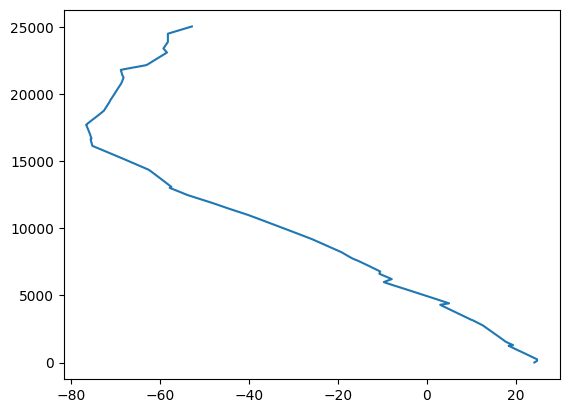

In [37]:
#Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

cada parte da atm é estavel neutra ou instavel? precisa calcular o gradiente de temp. onde está intavel, vermelho; onde está neutro, preto; onde está estavel, azul

[ 0.49180328  0.         -0.63380282 -0.67307692 -0.62295082 -0.64516129
  2.04081633 -0.66945607 -0.41237113 -0.42622951 -0.42763158 -0.42622951
 -0.47619048 -0.58981233 -0.83333333 -0.63063063 -0.62200957 -0.625
 -0.55555556  1.86915888 -0.92077088 -0.93596059 -0.95081967 -0.91743119
 -0.86021505  0.77669903  0.83333333 -0.7027027  -0.71090047  0.10638298
  0.13157895 -0.61403509 -0.62295082 -0.6440678  -1.         -0.73170732
 -0.54945055 -0.51660517 -0.58823529 -0.68181818 -0.78947368 -0.79957356
 -0.81325301 -0.92243187 -0.86956522 -0.90909091 -0.94435076 -0.74534161
 -0.76555024  0.57971014 -0.39308176 -0.40069686 -0.55555556 -0.42553191
 -0.7027027  -0.70866142 -0.72131148 -0.72413793 -0.0811359   0.35087719
 -0.13513514 -0.0896861  -0.12096774 -0.12232416 -0.13986014  0.31746032
  0.38194444  0.4         0.38095238  0.36585366  0.19379845  0.19337017
  0.15789474  0.20618557  0.1986755   0.18867925  0.1986755   0.16528926
  0.11764706  0.         -0.15151515 -0.09661836  0.    

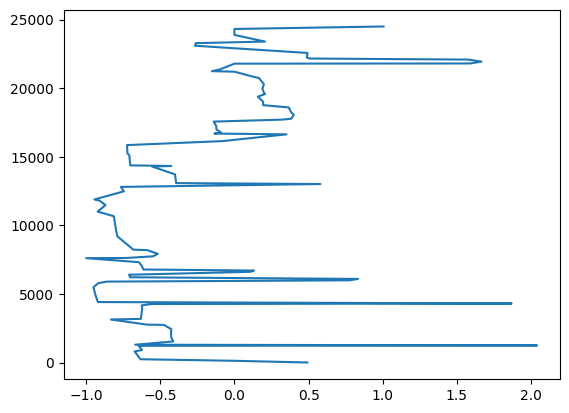

In [38]:
#Calcular o Gradiente de Temperatura

deltaT = np.diff(df['temperature']) #DIFF é o diferencial, vai calculando
deltaZ = np.diff(df['height'])

dTdZ = (deltaT/deltaZ)*100 #pois é a cada 100metros
print(dTdZ) #primeira camada, 0,49 a cada 100m; na segunda camada, -0,63 ainda está estável; inverteu no 2

fig,ax = plt.subplots()
ax.plot(dTdZ, df['height'][:-1])

# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorlógica.

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


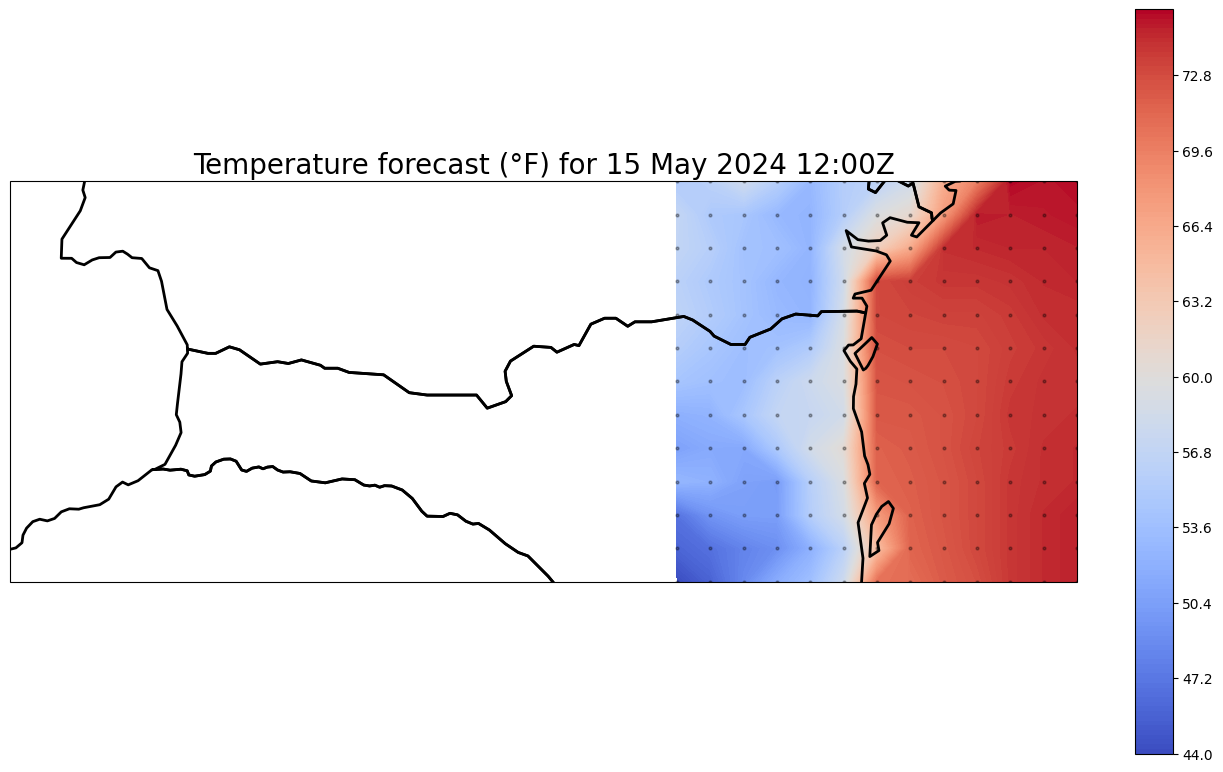

In [39]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-50).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55, -47, -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

Aula 05/15 - Dados de Sondagem
